In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('bike_sharing.csv')

## Initial Analysis

In [70]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week,isWeekend
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [8]:
df['holiday'].unique()

array([0, 1])

In [9]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [10]:
df['workingday'].unique()

array([0, 1])

In [11]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [12]:
df['weather'].unique()

array([1, 2, 3, 4])

In [13]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [14]:
df['temp'].value_counts()

temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: count, dtype: int64

In [15]:
print(f"Minimum temp : {df['temp'].min()}")
print(f"Maximum temp : {df['temp'].max()}")

Minimum temp : 0.82
Maximum temp : 41.0


In [16]:
df['atemp'].value_counts()

atemp
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: count, dtype: int64

In [17]:
print(f"Minimum atemp : {df['atemp'].min()}")
print(f"Maximum atemp : {df['atemp'].max()}")

Minimum atemp : 0.76
Maximum atemp : 45.455


In [18]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
df['humidity'].unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91])

In [20]:
df['humidity'].nunique()

89

In [21]:
df['humidity'].value_counts()

humidity
88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: count, Length: 89, dtype: int64

In [22]:
df['windspeed'].value_counts()

windspeed
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: count, dtype: int64

In [23]:
df['casual'].unique()

array([  3,   8,   5,   0,   2,   1,  12,  26,  29,  47,  35,  40,  41,
        15,   9,   6,  11,   4,   7,  16,  20,  19,  10,  13,  14,  18,
        17,  21,  33,  23,  22,  28,  48,  52,  42,  24,  30,  27,  32,
        58,  62,  51,  25,  31,  59,  45,  73,  55,  68,  34,  38, 102,
        84,  39,  36,  43,  46,  60,  80,  83,  74,  37,  70,  81, 100,
        99,  54,  88,  97, 144, 149, 124,  98,  50,  72,  57,  71,  67,
        95,  90, 126, 174, 168, 170, 175, 138,  92,  56, 111,  89,  69,
       139, 166, 219, 240, 147, 148,  78,  53,  63,  79, 114,  94,  85,
       128,  93, 121, 156, 135, 103,  44,  49,  64,  91, 119, 167, 181,
       179, 161, 143,  75,  66, 109, 123, 113,  65,  86,  82, 132, 129,
       196, 142, 122, 106,  61, 107, 120, 195, 183, 206, 158, 137,  76,
       115, 150, 188, 193, 180, 127, 154, 108,  96, 110, 112, 169, 131,
       176, 134, 162, 153, 210, 118, 141, 146, 159, 178, 177, 136, 215,
       198, 248, 225, 194, 237, 242, 235, 224, 236, 222,  77,  8

In [24]:
df['casual'].value_counts()

casual
0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: count, Length: 309, dtype: int64

In [25]:
df['registered'].value_counts()

registered
3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: count, Length: 731, dtype: int64

In [26]:
df['count'].value_counts()

count
5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [27]:
df['datetime']= pd.to_datetime(df['datetime'])

In [28]:
z_scores_casual= scipy.stats.zscore(df['casual'])
outliers= np.where((z_scores_casual<-3) | (z_scores_casual>3))
len(outliers)

1

Number of outliers in temp coulmn are : 0 
Number of outliers in atemp coulmn are : 0 
Number of outliers in humidity coulmn are : 22 
Number of outliers in windspeed coulmn are : 67 
Number of outliers in casual coulmn are : 292 
Number of outliers in registered coulmn are : 235 
Number of outliers in count coulmn are : 147 


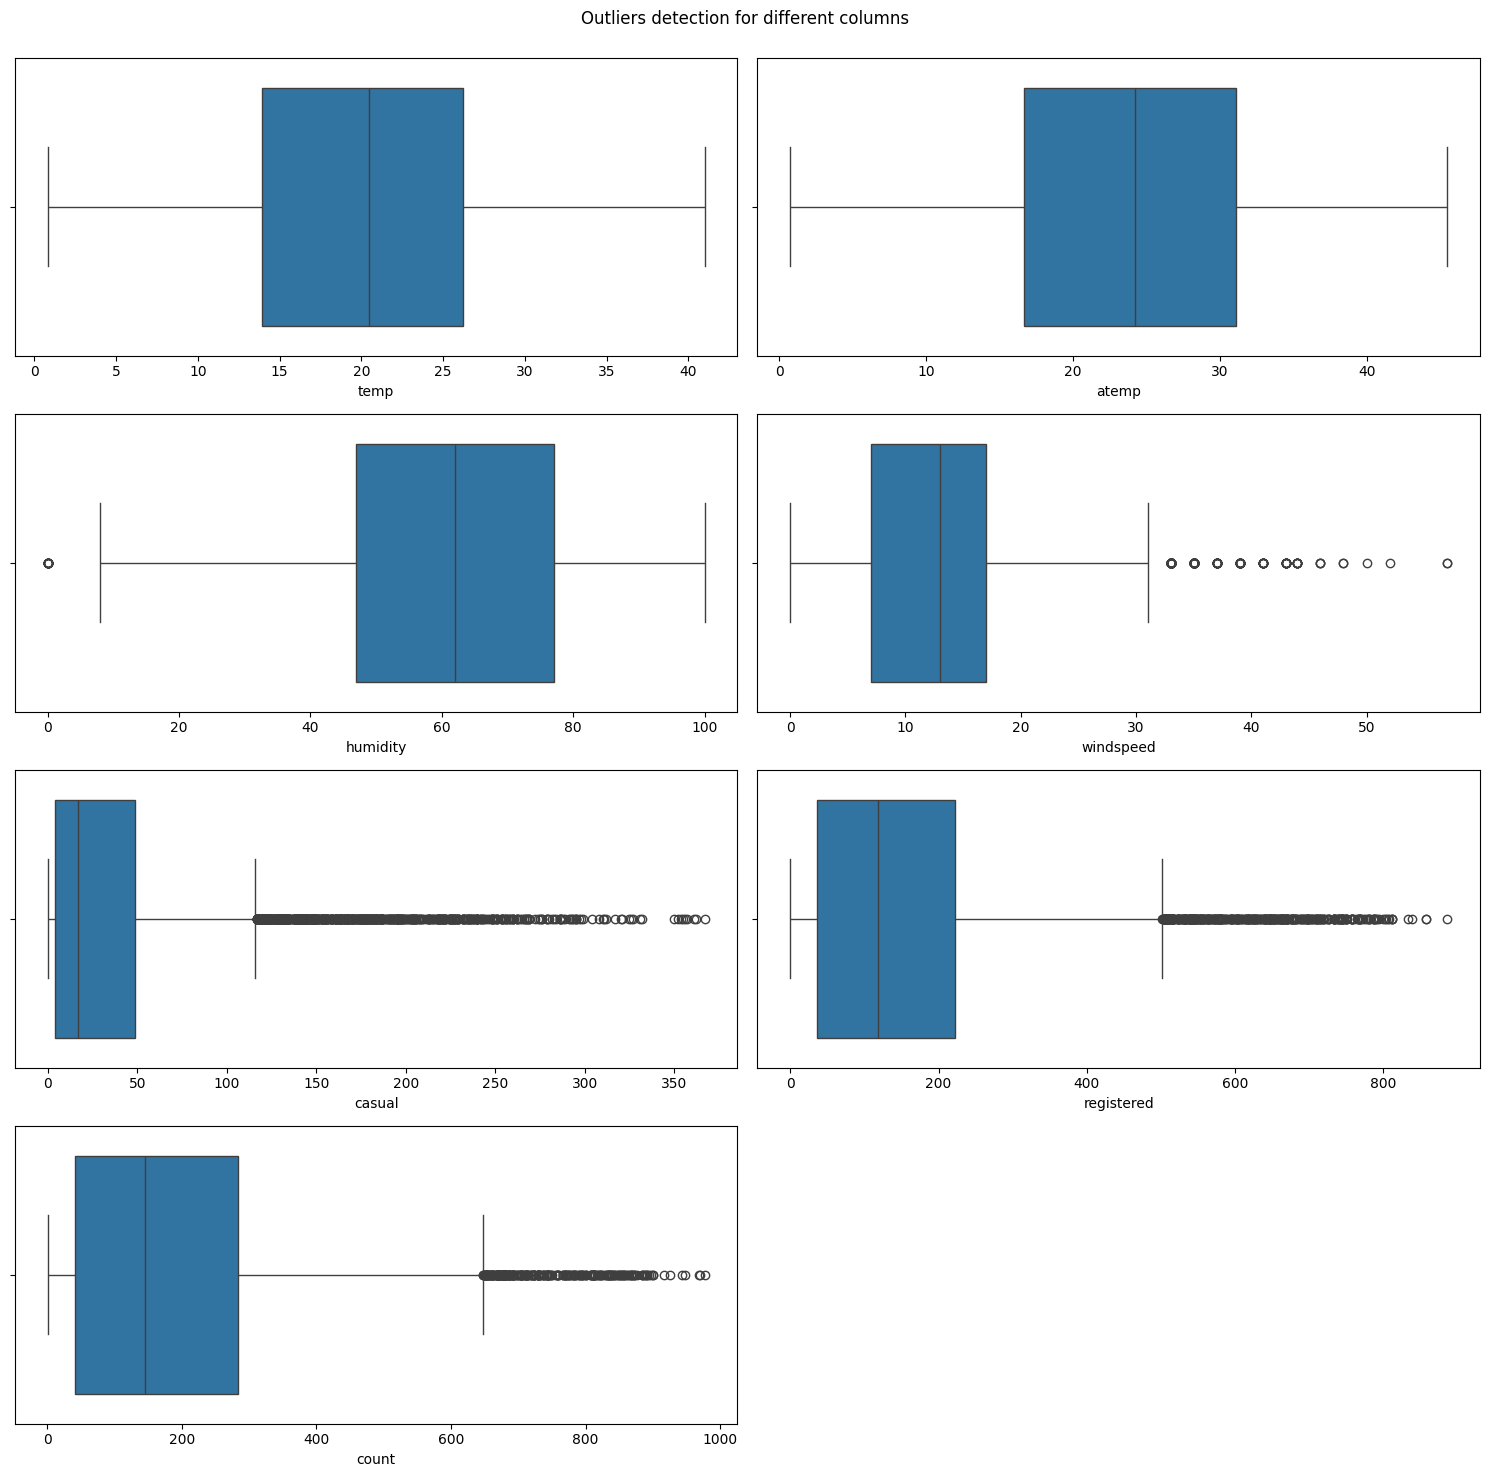

In [29]:
cols= ['temp','atemp','humidity','windspeed','casual','registered','count']
c=1
plt.figure(figsize = (15, 16))
for col in cols:
  z_scores = scipy.stats.zscore(df[col])
  outliers = np.where((z_scores < -3) | (z_scores > 3))[0]
  plt.subplot(4,2,c)
  sns.boxplot(x= df[col])
  c+=1
  print(f'Number of outliers in {col} coulmn are : {len(outliers)} ')

plt.suptitle('Outliers detection for different columns',y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- There are no outliers in temp, atemp columns
- There are less outliers present in humidity and windspeed columns
- we can observe more ouliers in casual,registered,count columns

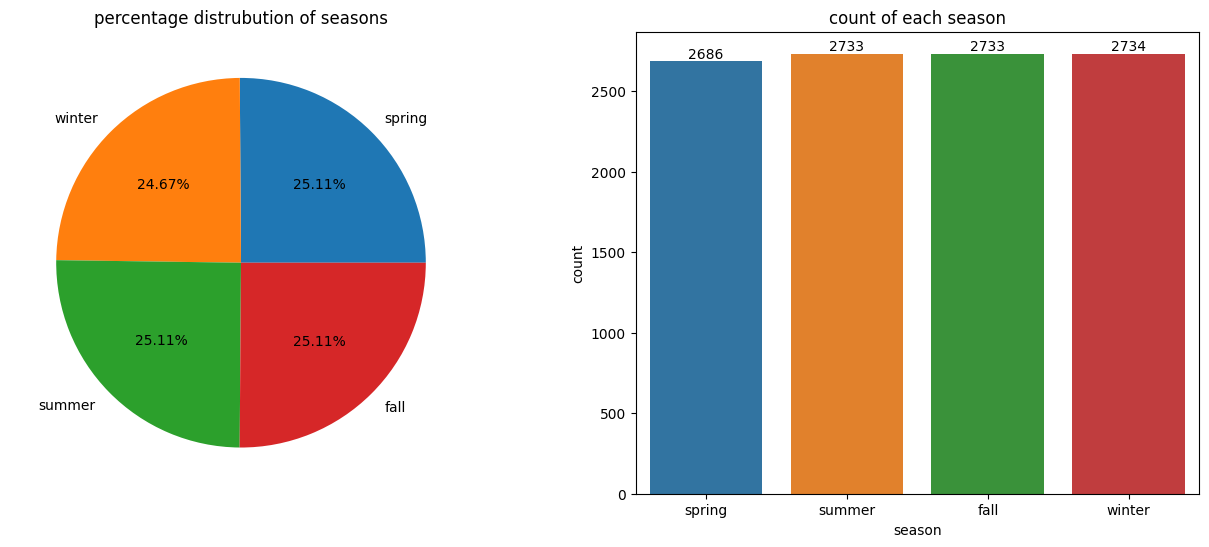

In [71]:
plt.figure(figsize=(16,6))
labels= ['spring','winter','summer','fall']
plt.subplot(1,2,1)
plt.title('percentage distrubution of seasons')
plt.pie(df.groupby('season')['season'].count(),labels=labels,autopct = '%0.2f%%')
plt.subplot(1,2,2)
plt.title('count of each season')
label= sns.countplot(x=df['season'] ,hue=df['season'])
for i in label.containers:
 label.bar_label(i)
plt.show()

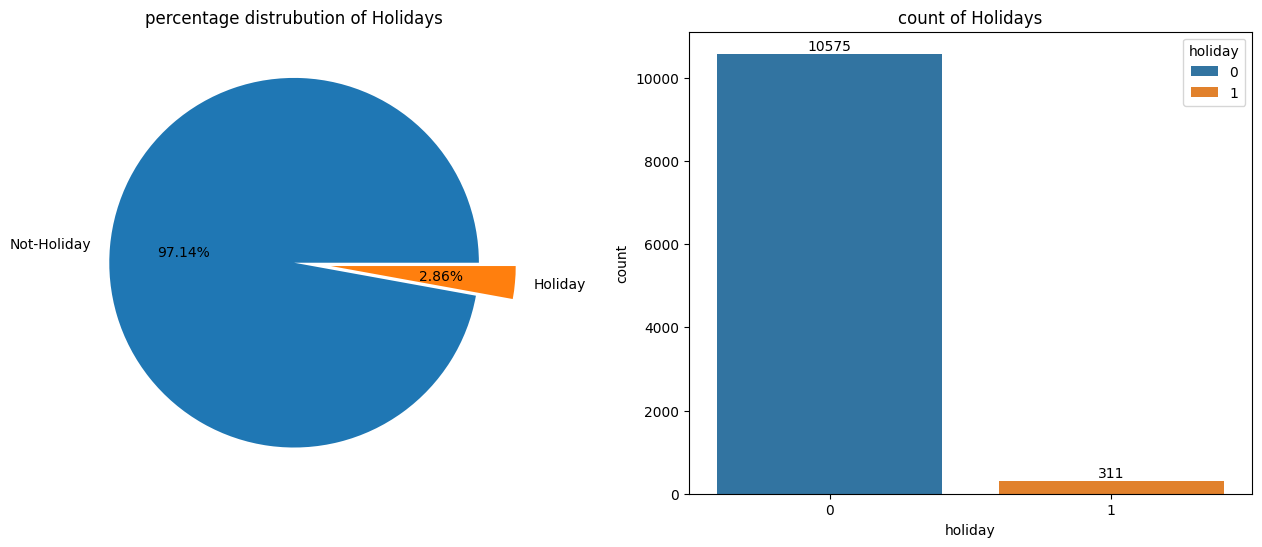

In [31]:
plt.figure(figsize=(16,6))
labels= ['Not-Holiday','Holiday']
plt.subplot(1,2,1)
plt.title('percentage distrubution of Holidays')
plt.pie(df.groupby('holiday')['holiday'].count(),labels=labels,autopct = '%0.2f%%',explode=[0,0.2])
plt.subplot(1,2,2)
plt.title('count of Holidays')
label= sns.countplot(x=df['holiday'] ,hue=df['holiday'])
for i in label.containers:
 label.bar_label(i)
plt.show()

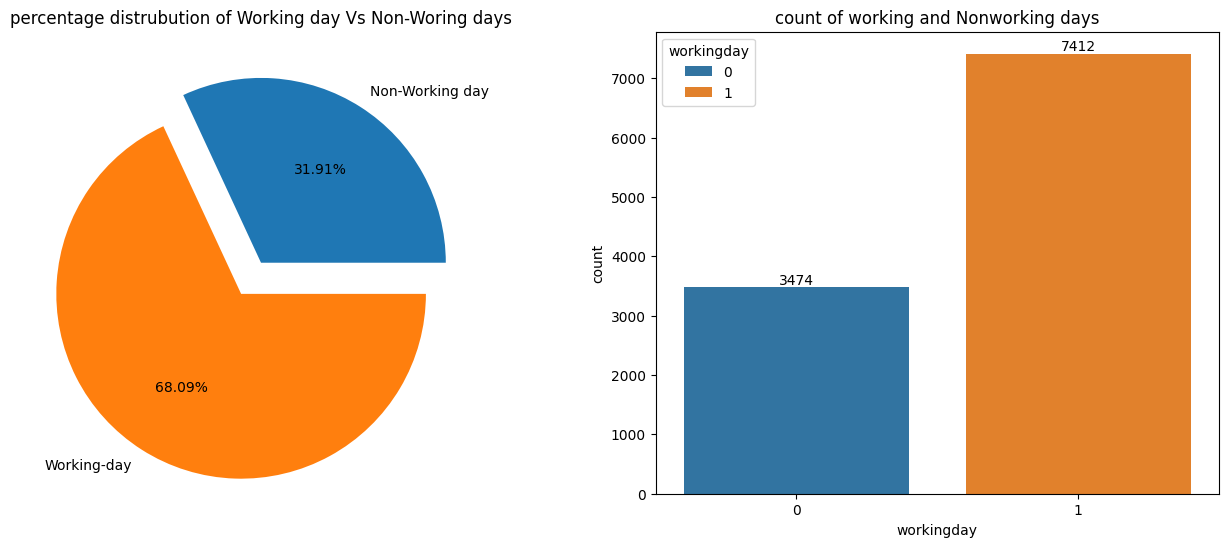

In [32]:
plt.figure(figsize=(16,6))
labels= ['Non-Working day','Working-day']
plt.subplot(1,2,1)
plt.title('percentage distrubution of Working day Vs Non-Woring days')
plt.pie(df.groupby('workingday')['workingday'].count(),labels=labels,autopct = '%0.2f%%',explode=[0,0.2])
plt.subplot(1,2,2)
plt.title('count of working and Nonworking days')
label= sns.countplot(x=df['workingday'] ,hue=df['workingday'])
for i in label.containers:
 label.bar_label(i)
plt.show()

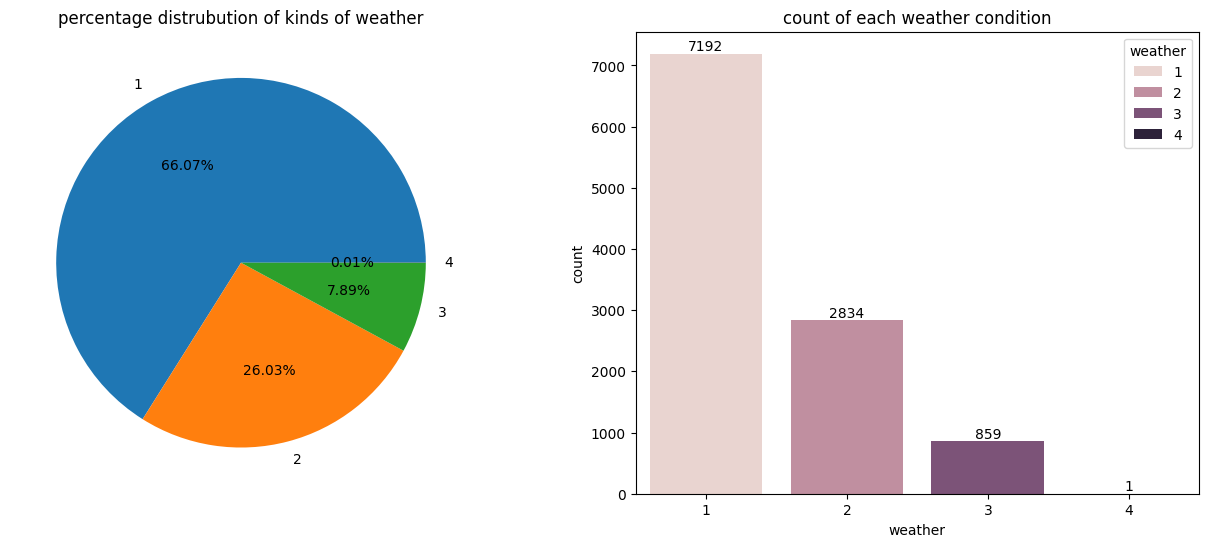

In [72]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
labels=[1,2,3,4]
plt.title('percentage distrubution of kinds of weather')
plt.pie(df.groupby('weather')['weather'].count(),labels=labels,autopct = '%0.2f%%')
plt.subplot(1,2,2)
plt.title('count of each weather condition')
label= sns.countplot(x=df['weather'] ,hue=df['weather'])
for i in label.containers:
 label.bar_label(i)
plt.show()

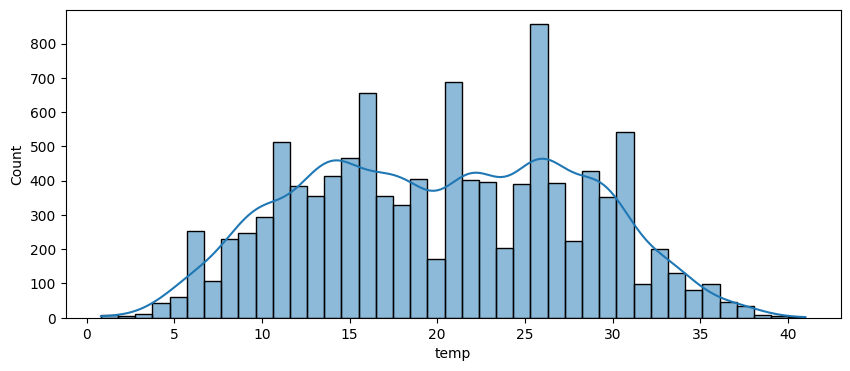

In [34]:
plt.figure(figsize=(10,4))
sns.histplot(x=df['temp'],kde=True,bins=41)
plt.show()

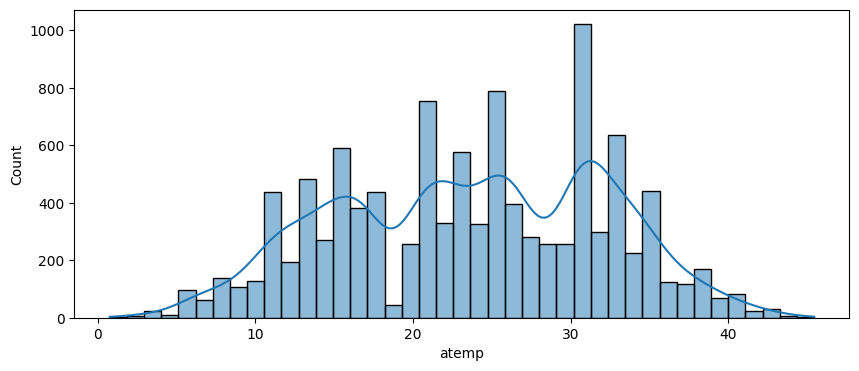

In [35]:
plt.figure(figsize=(10,4))
sns.histplot(x=df['atemp'],kde=True,bins=41)
plt.show()

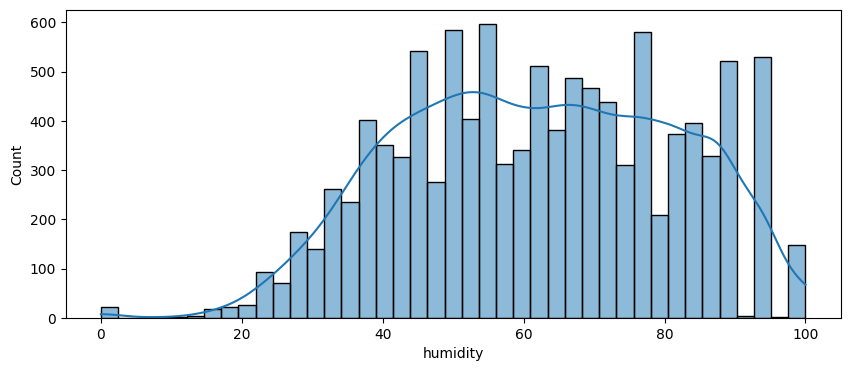

In [36]:
plt.figure(figsize=(10,4))
sns.histplot(x=df['humidity'],kde=True,bins=41)
plt.show()

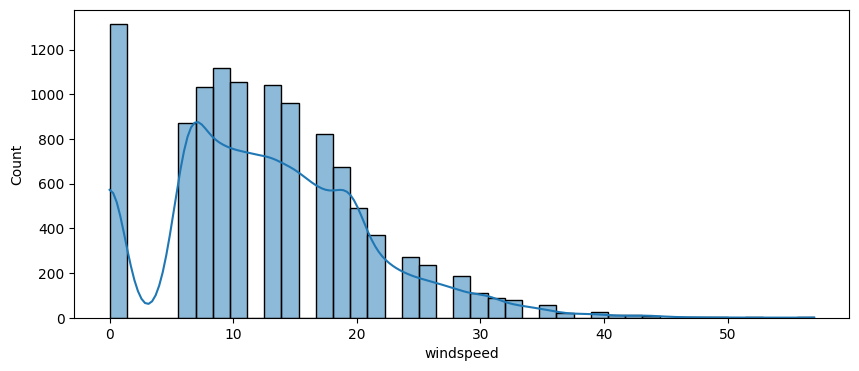

In [37]:
plt.figure(figsize=(10,4))
sns.histplot(x=df['windspeed'],kde=True,bins=41)
plt.show()

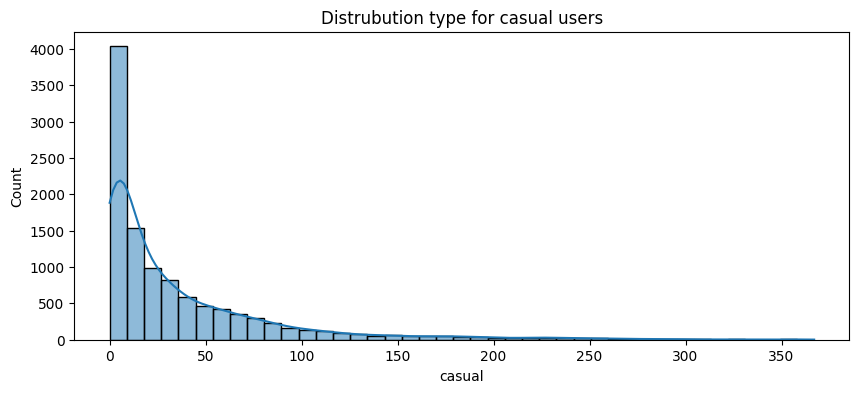

In [38]:
plt.figure(figsize=(10,4))
plt.title('Distrubution type for casual users')
sns.histplot(x=df['casual'],kde=True,bins=41)
plt.show()

-Here the distrubution for casual user count is right skewed distrubution

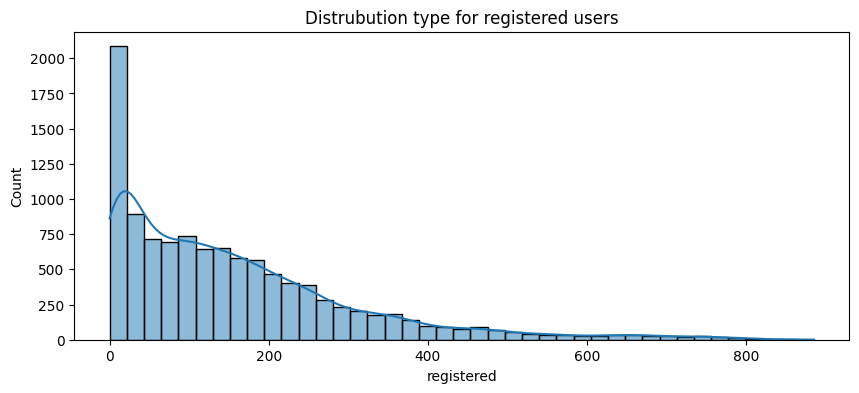

In [39]:
plt.figure(figsize=(10,4))
plt.title('Distrubution type for registered users')
sns.histplot(x=df['registered'],kde=True,bins=41)
plt.show()

-Here the distrubution for registered users is right skewed distrubution

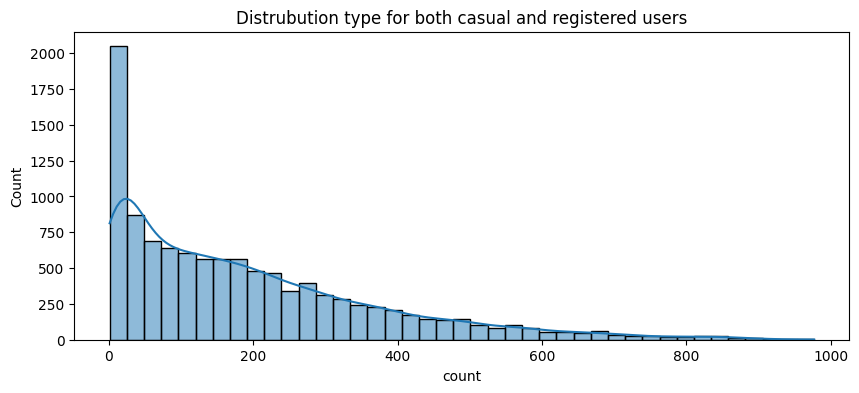

In [40]:
plt.figure(figsize=(10,4))
plt.title('Distrubution type for both casual and registered users')
sns.histplot(x=df['count'],kde=True,bins=41)
plt.show()

-Here the distrubution for both registred and casual is right skewed distrubution

### count of Users varying from 2011 to 2012

In [41]:
df.groupby(df['datetime'].dt.year)['count'].agg({'mean','count'}).reset_index()

,datetime,mean,count
0,2011,144.223349,5422
1,2012,238.560944,5464


- Percentage Increase (238.56-144.22)/144.22 =0.65*100 =65.41
- **Percentage increase** from 2011 to 2012 : **65.41**

### Count of users varying over months

In [42]:
df1 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)
df1['prev_count'] = df1['count'].shift(1)
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


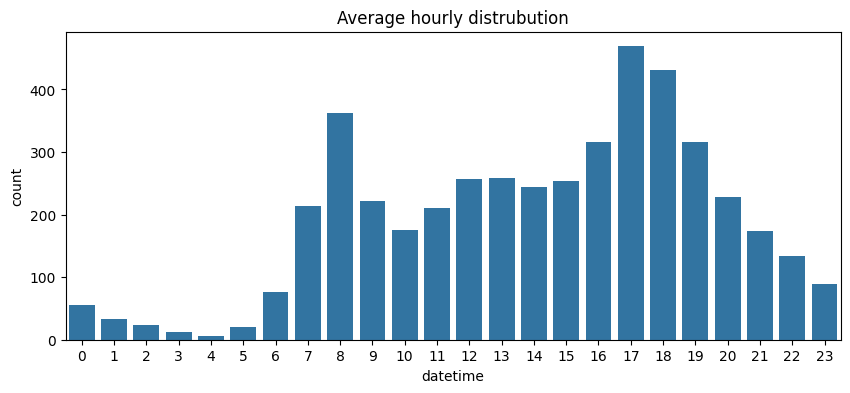

In [43]:
plt.figure(figsize=(10,4))
plt.title('Average hourly distrubution')
df2= df.groupby(df['datetime'].dt.hour)['count'].mean()
sns.barplot(data=df2)
plt.show()

- count of users in 4th hour are very less .
- count of users in 17th,18th,and 8th are compartively high in average users count

In [44]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


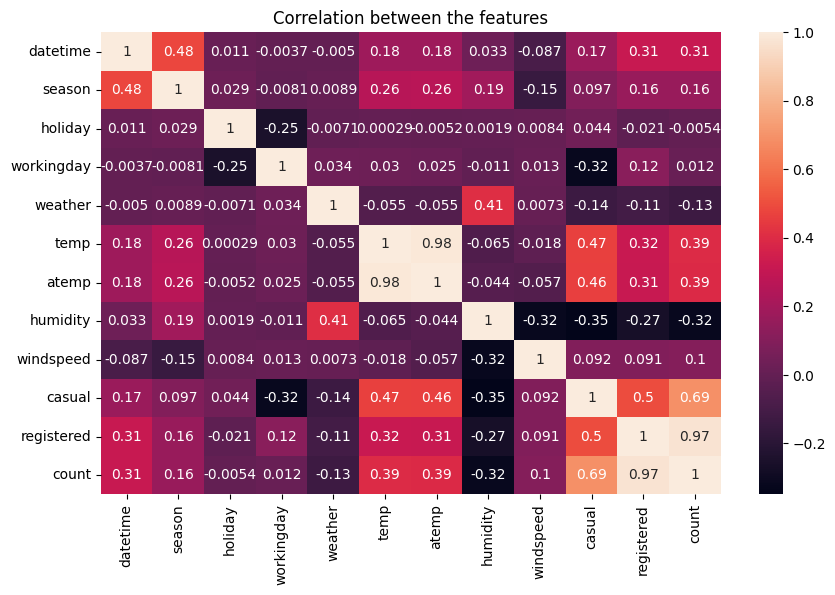

In [45]:
plt.figure(figsize=(10,6))
plt.title('Correlation between the features')
sns.heatmap(df.corr(),annot=True)
plt.show()

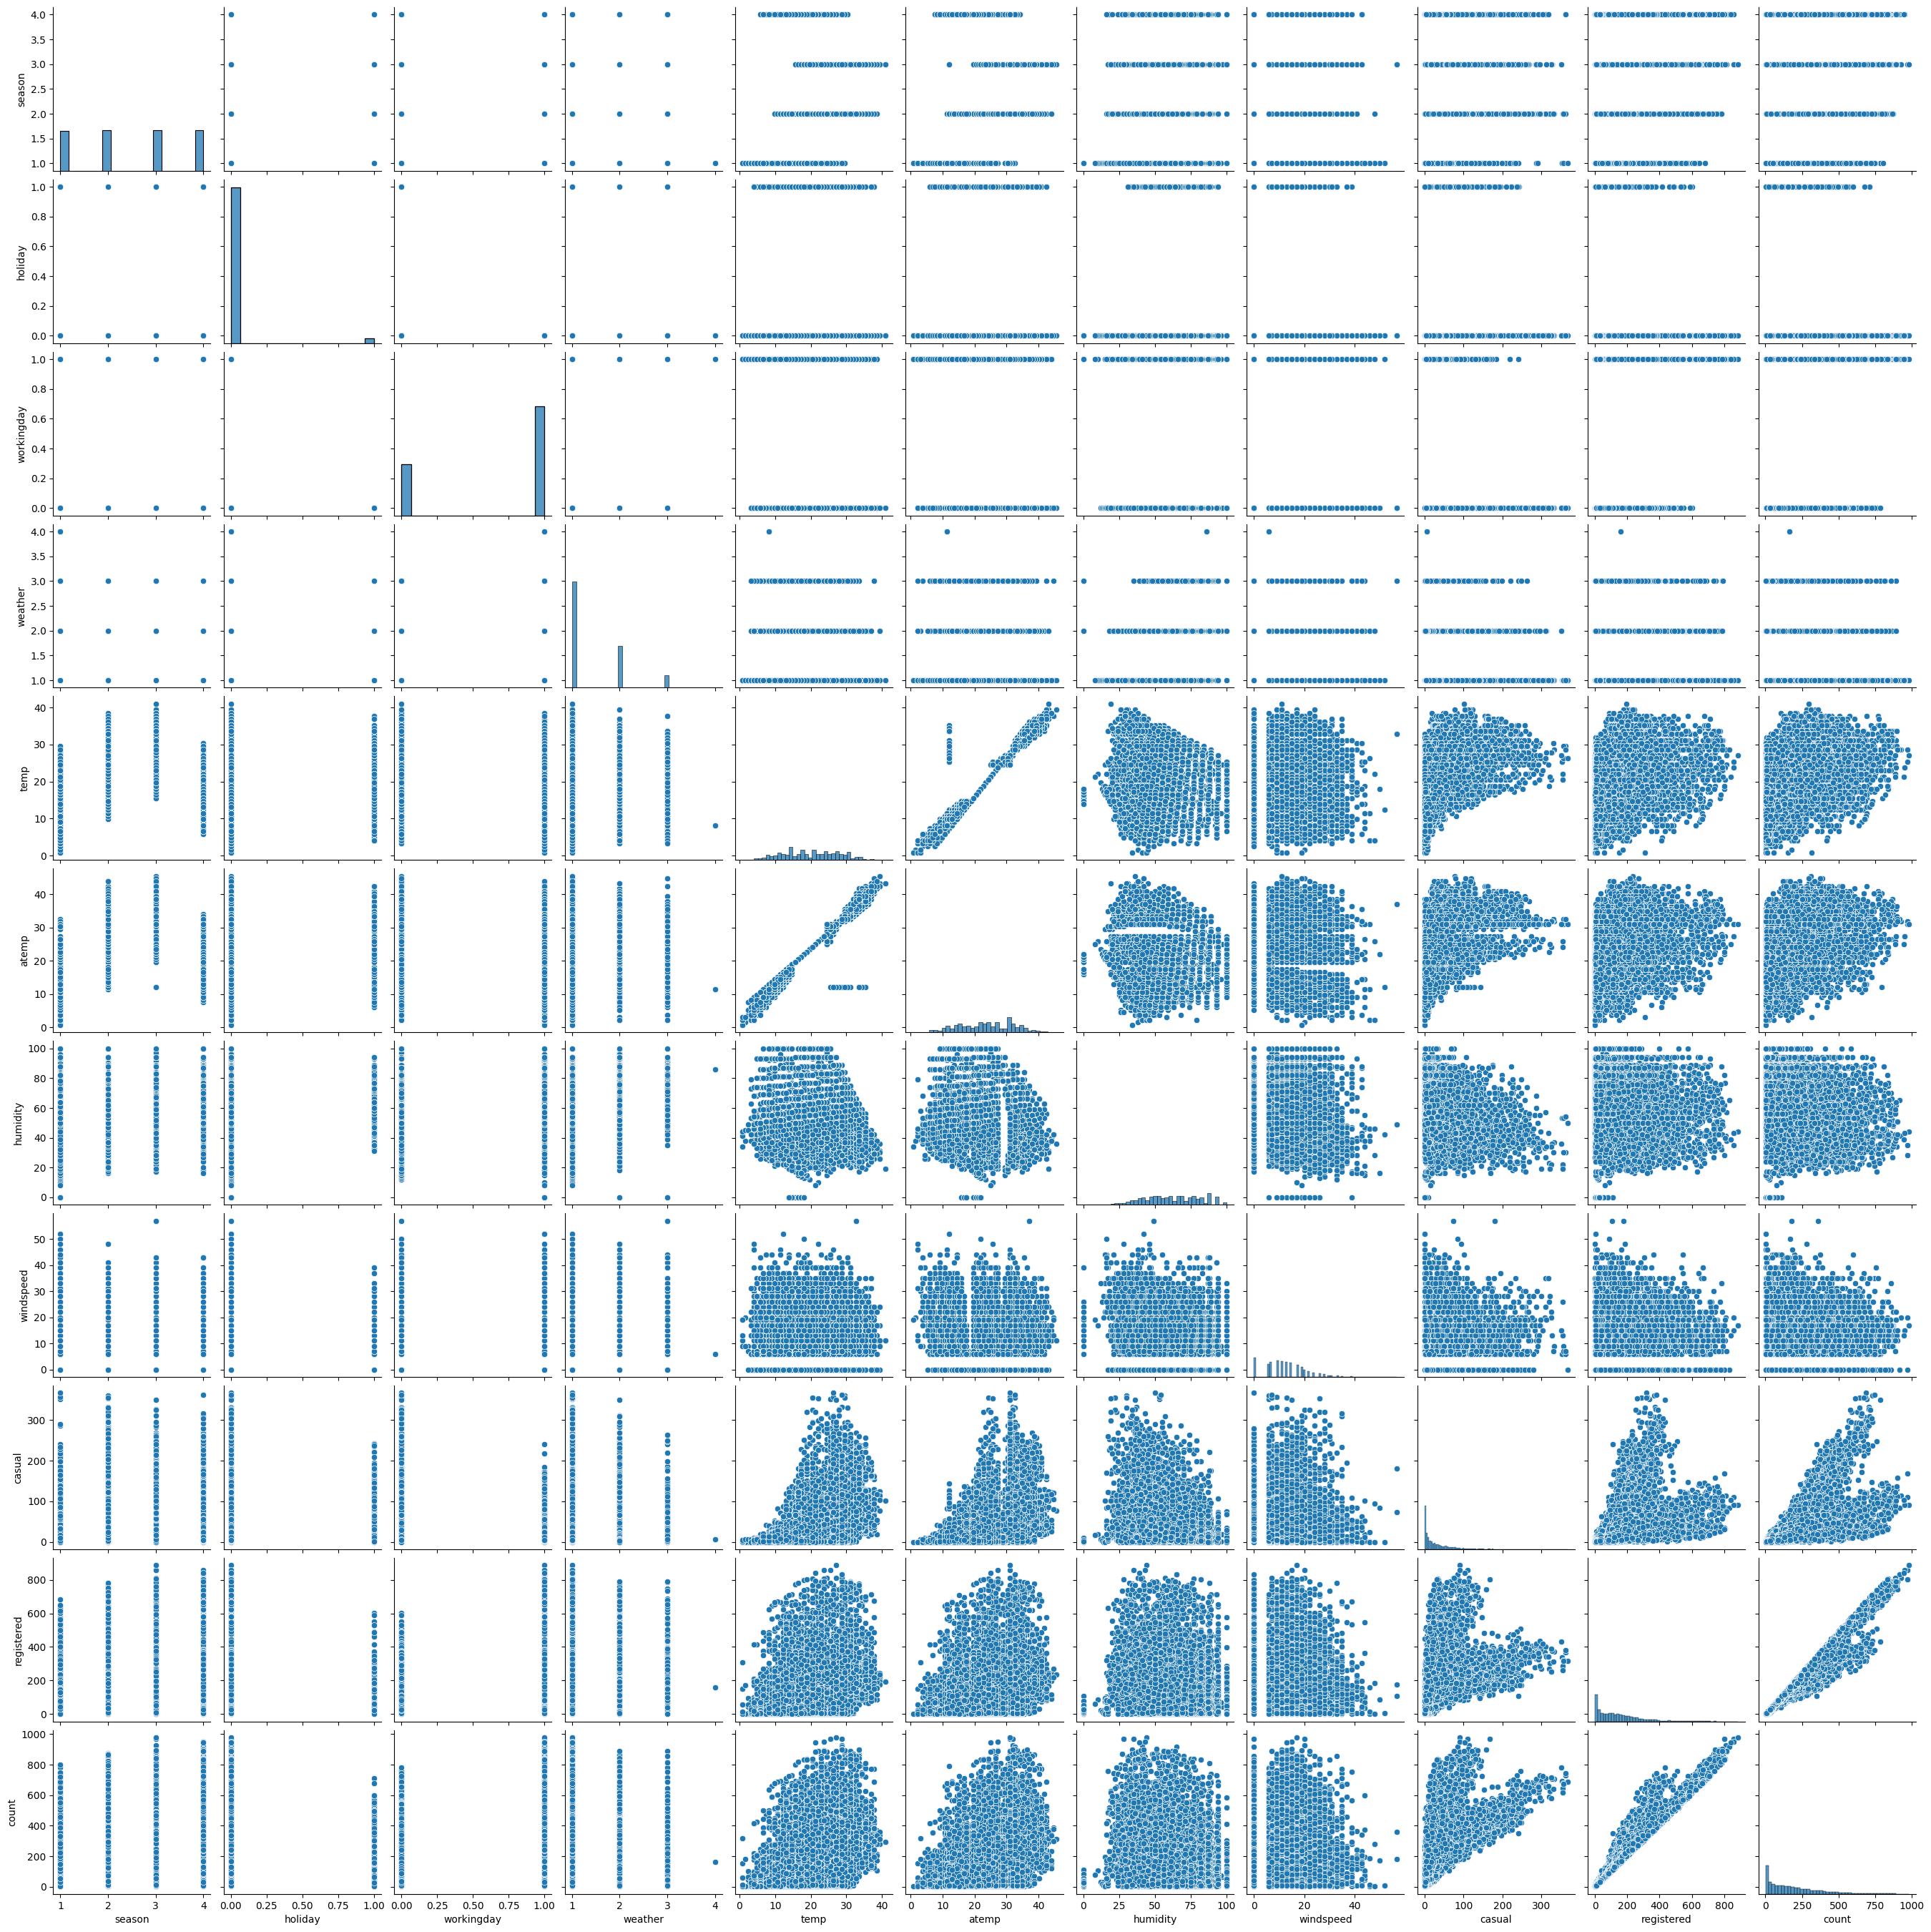

In [46]:
sns.pairplot(data=df)
plt.show()

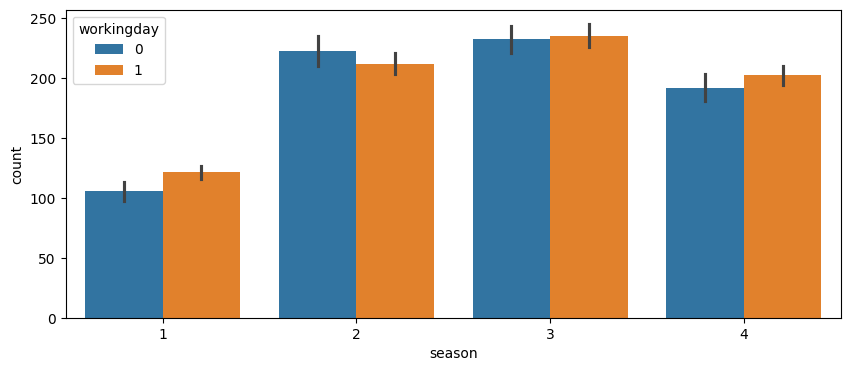

In [47]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['season'],y=df['count'],hue=df['workingday'])
plt.show()

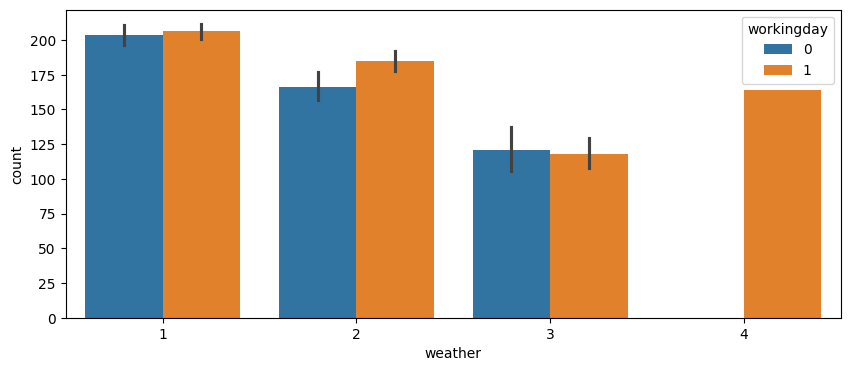

In [48]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['weather'],y=df['count'],hue=df['workingday'])
plt.show()

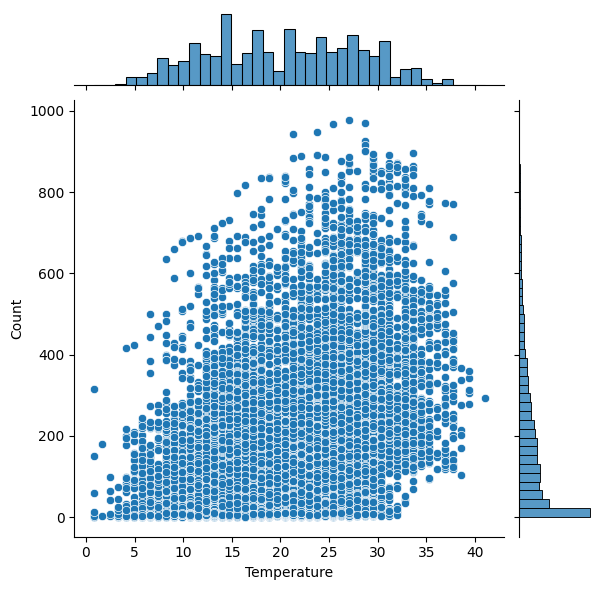

In [49]:
sns.jointplot(x='temp', y='count', data=df, kind='scatter')
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.show()

In [50]:
df['day_of_week'] = df['datetime'].dt.dayofweek

# we will consider days 0-5 are week days and 5,6 are weekends here .
df['isWeekend']= df['day_of_week'].apply(lambda x: 0 if x<5 else 1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week,isWeekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1


### **Hypothesis Testing -1**





## Is there any significant difference between the no. of bike rides on Weekdays and Weekends?

---

### Formulate Null and Alternative Hypothesis.

- **Null Hypothesis(H0)** : no.of bike rides on weekdays are same as weekends.
- **Alternative Hypothesis(H1)** : no.of bike rides on weekdays are not same as weekends.

-Assumed **significance value(alpha)** : 5% i.e.  0.05

- Based on p-value, we will accept or reject H0.
  - if **p-value < alpha** : Reject Null(H0)
  - if **p-value > alpha** : Fail to Reject Null(H0)


In [51]:
df_weekdays= df[df['isWeekend']==0]['count']
df_weekends= df[df['isWeekend']==1]['count']


### **testing the type of distrubution**

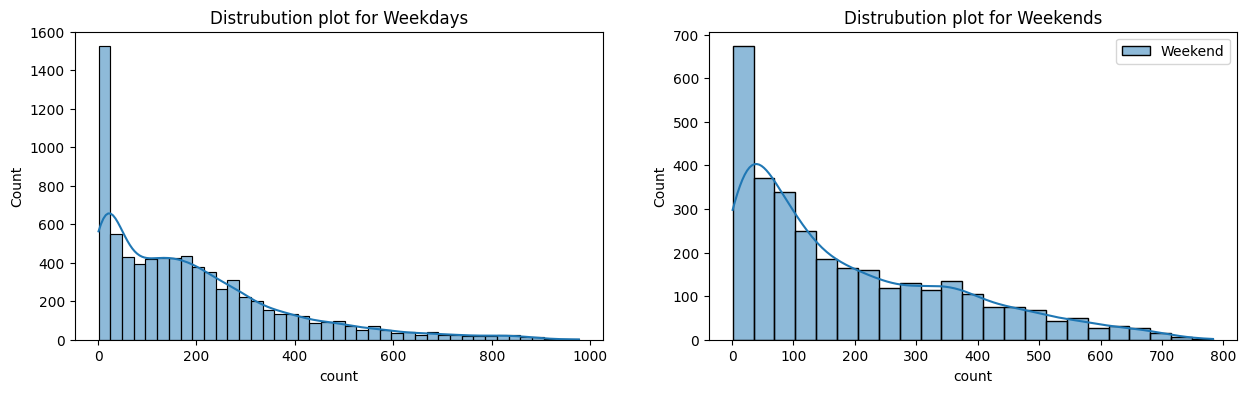

In [52]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(df_weekdays,kde=True)
plt.title('Distrubution plot for Weekdays')
plt.subplot(1,2,2)
sns.histplot(df_weekends,kde=True,label='Weekend')
plt.title('Distrubution plot for Weekends')
plt.legend()
plt.show()

- The above distrubution is right skewd distrubution we can apply log to convert it to Log normal distrubution.
- we  will plot Q-Q plot for above to check normality.

### **Distrubution check using Q-Q plot**




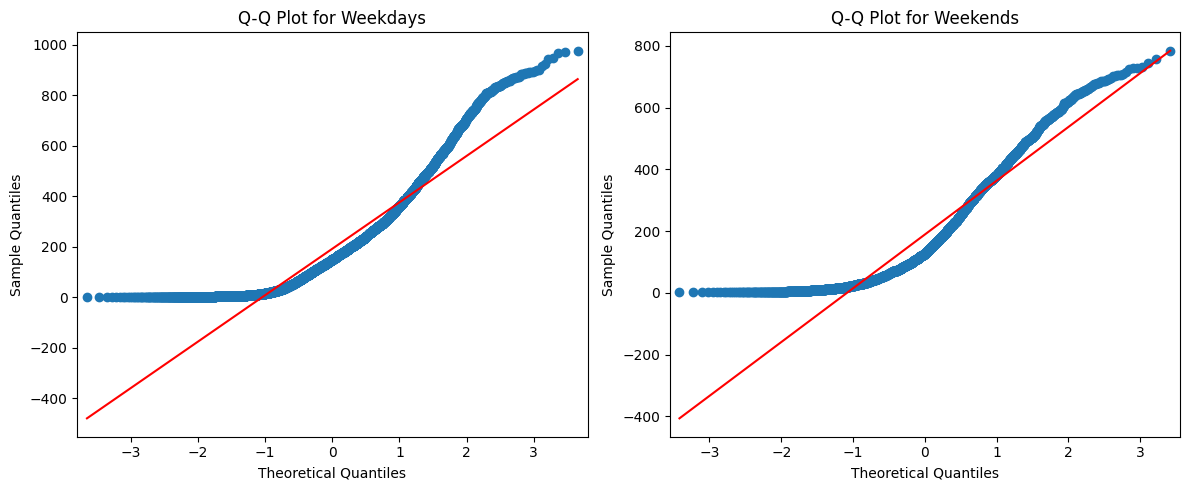

In [53]:
from statsmodels.graphics.gofplots import qqplot

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

qqplot(df_weekdays, line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot for Weekdays')

qqplot(df_weekends, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot for Weekends')

plt.tight_layout()
plt.show()


### Testing the variance using Levene test

In [54]:
from scipy.stats import levene

# H0 : Variance is same
# H1 : Variance is not same

alpha = 0.05
test_stat, p_value = levene(df_weekdays, df_weekends)

print('p_value',p_value)

if p_value< 0.05:
  print('Reject null, that is they dont have same variance')
else:
  print('Fail to reject null, that is they have same variance')

p_value 0.955218859658268
Fail to reject null, that is they have same variance


- we can say from above that plots don't follow normal distrubutions.
- Since the distrubution are not following Normal Distrubution so, it is not suitable to apply T-Test.
- So we perform non-parametric test i.e. kruskal wallis.


In [55]:
from scipy.stats import kruskal

test_stat, p_value= kruskal(df_weekdays,df_weekends)
alpha=0.05
print('P_value', p_value)
if p_value< alpha:
  print('No. of bikes rented in weekdays is not same as weekends')
else:
  print('No. of bikes rented in weekdays is same as weekends')

P_value 0.9172827117957012
No. of bikes rented in weekdays is same as weekends


#### **Therefore we can conclude that bikes rented on weekdays and weekends are same.**

### **Hypothesis Testing -2**

## Is the demand of bicycles on rent is the same for different Weather conditions?

---

### Formulate Null and Alternative Hypothesis.

- **Null Hypothesis(H0)** : no.of bicycles rented are same for different weather.
- **Alternative Hypothesis(H1)** : no.of bicycles rented are not same for different weather.

-Assumed **significance value(alpha)** : 5% i.e.  0.05

- Based on p-value, we will accept or reject H0.
  - if **p-value < alpha** : Reject Null(H0)
  - if **p-value > alpha** : Fail to Reject Null(H0)


- Here , we are comparing 3 or more groups so will use ANOVA test for this.
- here type 4 weather has only 1 value so we ignore it while testing our hypothesis.



In [56]:
df_weather_1 = df[df['weather']==1]['count']
df_weather_2 = df[df['weather']==2]['count']
df_weather_3 = df[df['weather']==3]['count']
df_weather_4 = df[df['weather']==4]['count']

###Testing the type of distrubution

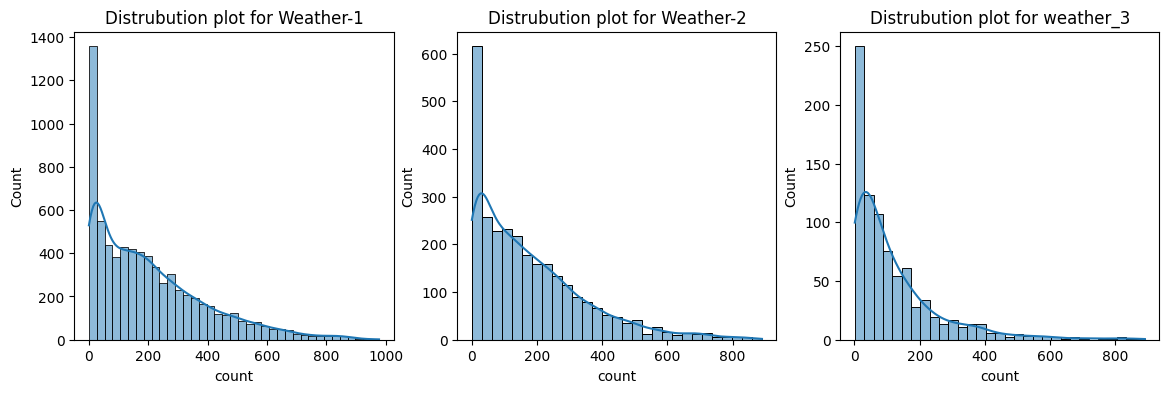

In [57]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(df_weather_1,kde=True)
plt.title('Distrubution plot for Weather-1')
plt.subplot(1,3,2)
sns.histplot(df_weather_2,kde=True)
plt.title('Distrubution plot for Weather-2')
plt.subplot(1,3,3)
sns.histplot(df_weather_3,kde=True)
plt.title('Distrubution plot for weather_3')

plt.show()

- The plots are right-skewed distrubutions.
- we can check normality using Q-Q plots

#### Distrubution check using Q-Q plots

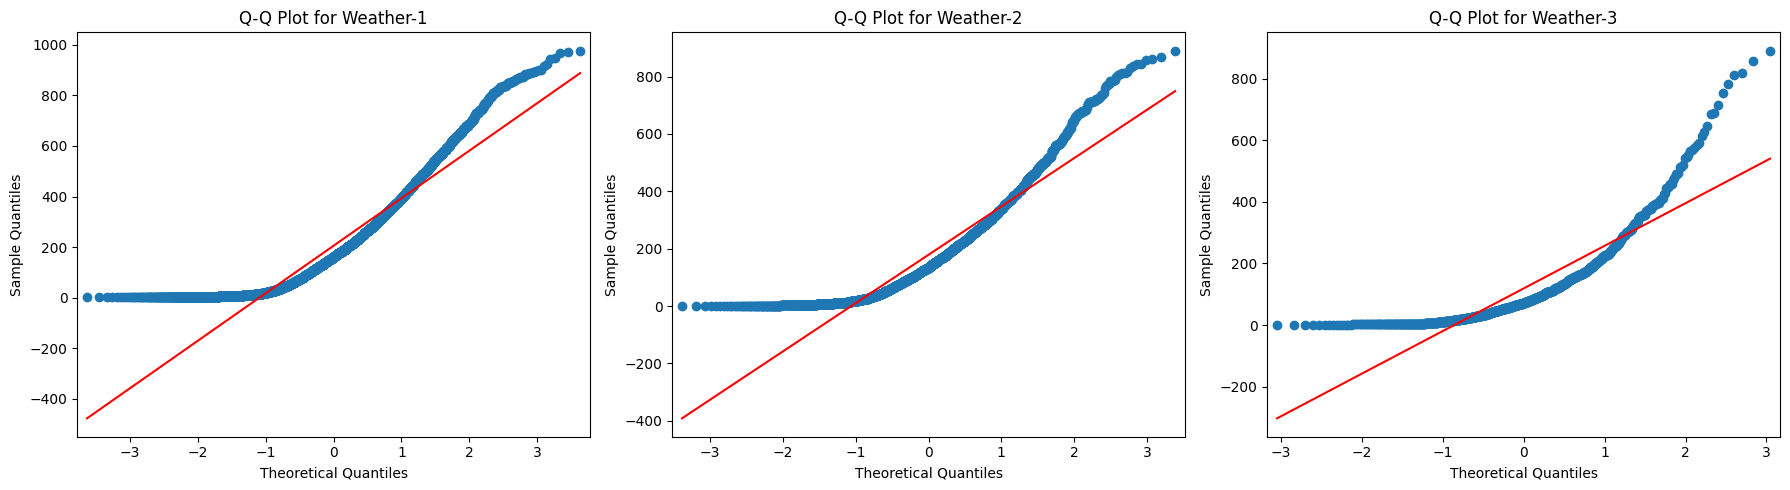

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

qqplot(df_weather_1, line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot for Weather-1')

qqplot(df_weather_2, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot for Weather-2')

qqplot(df_weather_3, line='s', ax=axes[2])
axes[2].set_title('Q-Q Plot for Weather-3')

plt.tight_layout()
plt.show()


- From, above Q-Q plots we can say that the data is not normally distrubuted.
- We will check the variance of these groups.


#### **Test for variance.**(**Levene Test**)

In [59]:

# H0 : Variance is same
# H1 : Variance is not same

alpha = 0.05
test_stat, p_value = levene(df_weather_1, df_weather_2,df_weather_3)

print('p_value',p_value)

if p_value< 0.05:
  print('Reject null, that is they dont have same variance')
else:
  print('Fail to reject null, that is they have same variance')

p_value 6.198278710731511e-36
Reject null, that is they dont have same variance


- Since the data is not normally distrubuted and Variances are not same.
- So, the assumputions of ANOVA not true.
- Hence, we proceed with kruskal wallis test.

In [60]:
test_stat, p_value= kruskal(df_weather_1,df_weather_2,df_weather_3)

# siginificant value
alpha=0.05

print('P_value', p_value)

if p_value< alpha:
  print('No.of bicycles rented are different for different weather. ')
else:
  print('no.of bicycles rented are not different for different weather')

P_value 3.122066178659941e-45
No.of bicycles rented are different for different weather. 


#### **Hence, we can say that bicycles rented on diffrent weather are different.**




### **Hypothesis Testing -3**

## Is the demand of bicycles on rent is the same for different Seasons?

---

### Formulate Null and Alternative Hypothesis.

- **Null Hypothesis(H0)** : bicycles rented are same for different Seasons.
- **Alternative Hypothesis(H1)** : bicycles rented are not same for different Seasons.

-Assumed **significance value(alpha)** : 5% i.e.  0.05

- Based on p-value, we will accept or reject H0.
  - if **p-value < alpha** : Reject Null(H0)
  - if **p-value > alpha** : Fail to Reject Null(H0)

In [61]:
df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [62]:
df_spring = df[df['season']=='spring']['count']
df_summer = df[df['season']=='summer']['count']
df_fall = df[df['season']=='fall']['count']
df_winter = df[df['season']=='winter']['count']


#### **Testing the type of distrubution**

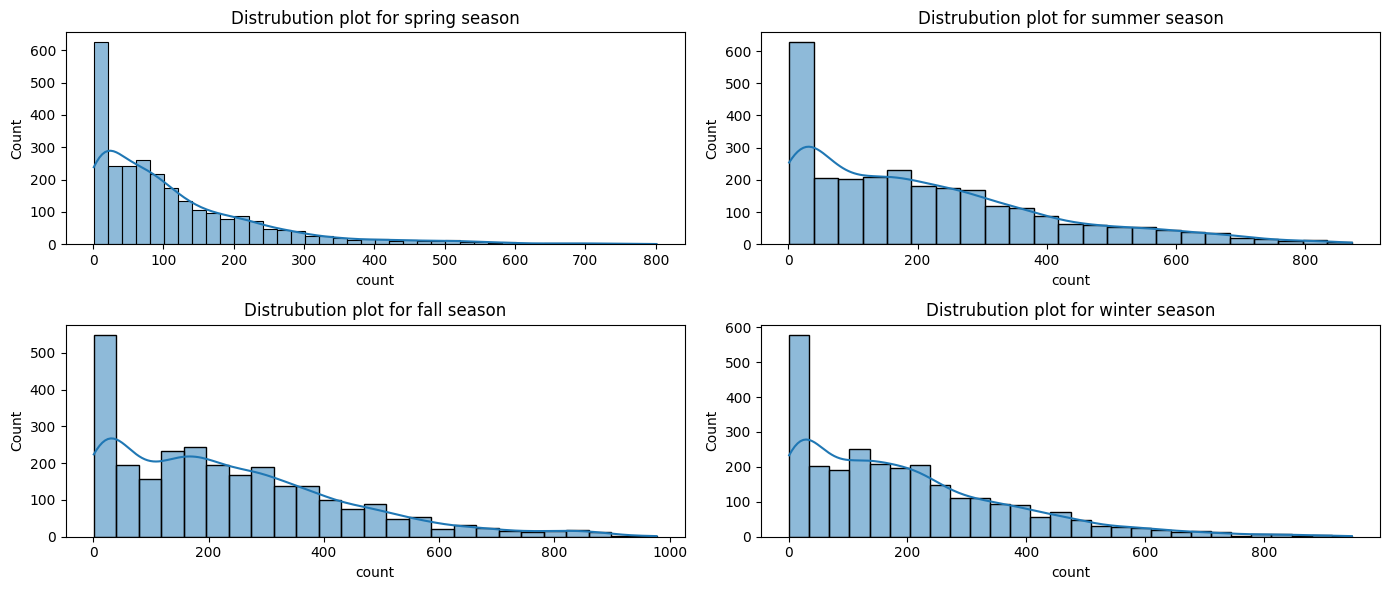

In [63]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.histplot(df_spring,kde=True)
plt.title('Distrubution plot for spring season')
plt.subplot(2,2,2)
sns.histplot(df_summer,kde=True)
plt.title('Distrubution plot for summer season')
plt.subplot(2,2,3)
sns.histplot(df_fall,kde=True)
plt.title('Distrubution plot for fall season')
plt.subplot(2,2,4)
sns.histplot(df_winter,kde=True)
plt.title('Distrubution plot for winter season')
plt.tight_layout()
plt.show()

- From above graph we can say that Distrubution is Right skewed
- we will check with the Q-Q plot.

### Normality using Q-Q plot

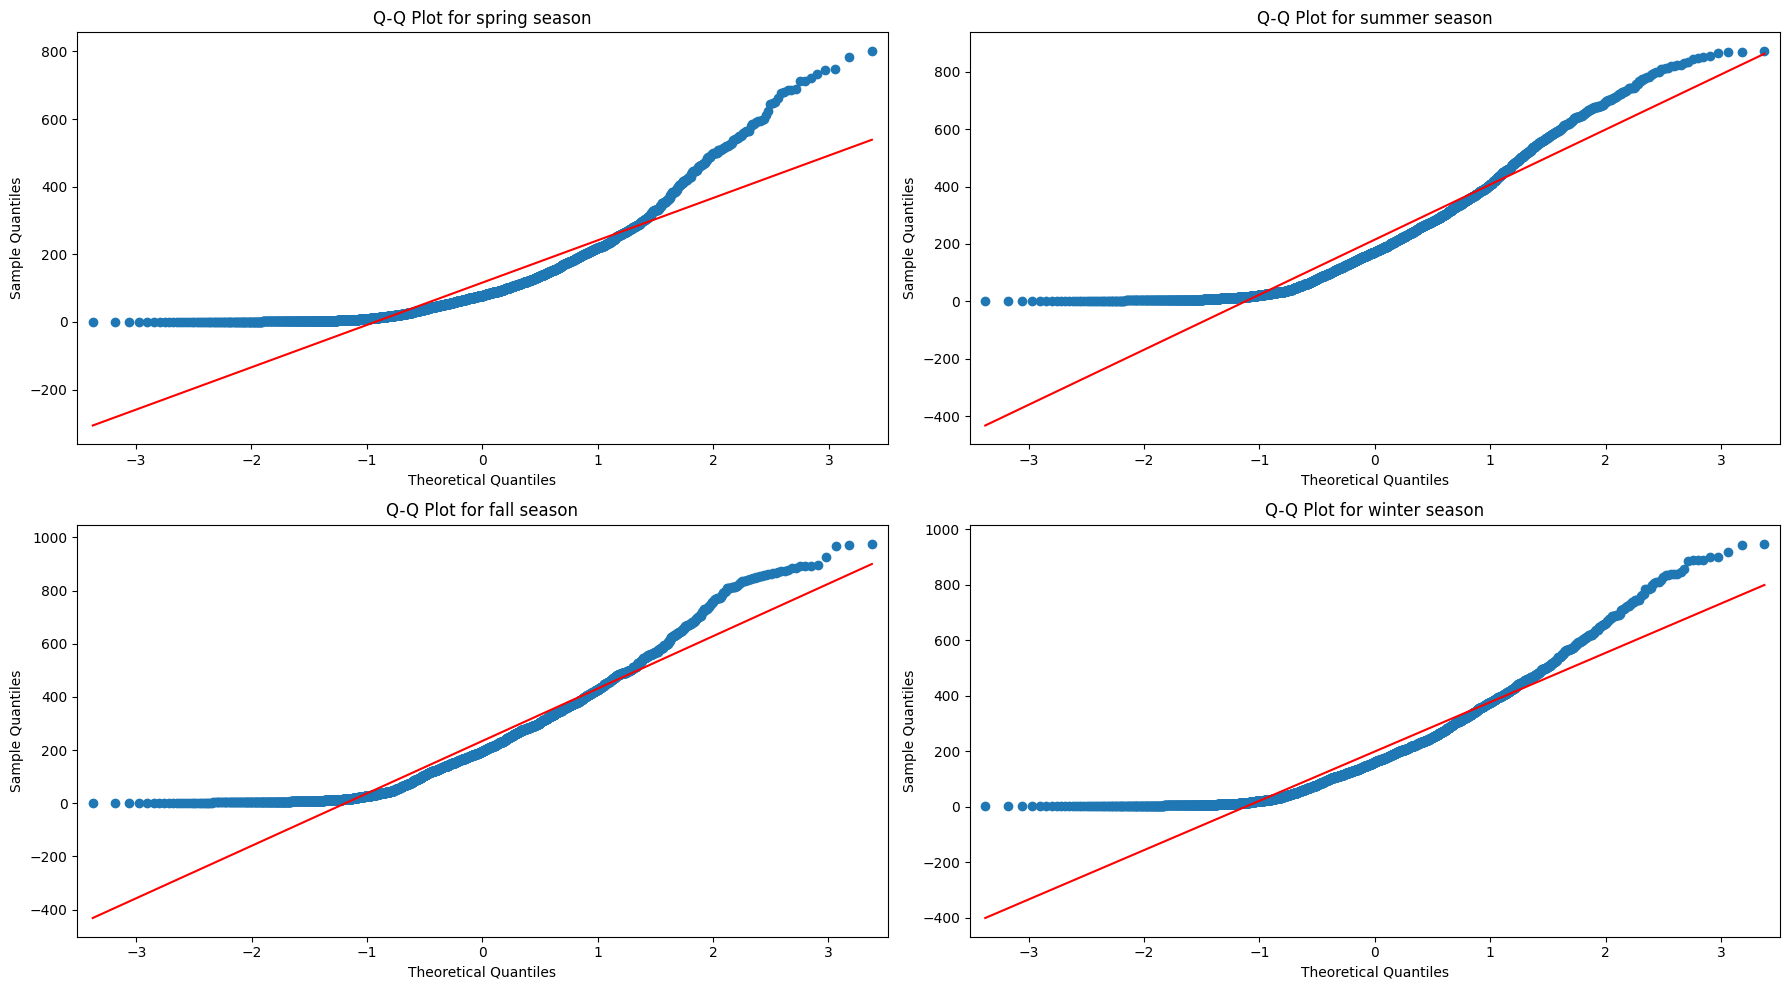

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

qqplot(df_spring, line='s', ax=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot for spring season')

qqplot(df_summer, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot for summer season')

qqplot(df_fall, line='s', ax=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot for fall season')

qqplot(df_winter, line='s', ax=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot for winter season')

plt.tight_layout()
plt.show()

- From, above Q-Qplots we can say that data is not normally distrubuted.
- we will check for variances of the groups.


#### **Test for Variances**(**Lenvene Test**)

In [65]:
# H0 : Variance is same
# H1 : Variance is not same

# Siginificant value
alpha = 0.05

test_stat, p_value = levene(df_spring, df_summer,df_fall,df_winter)

print('p_value',p_value)

if p_value< 0.05:
  print('Reject null, that is they dont have same variance')
else:
  print('Fail to reject null, that is they have same variance')

p_value 1.0147116860043298e-118
Reject null, that is they dont have same variance


- Since the distrubution is not normal and they don't share same variances.
- The assumptions of ANOVA are held not true.
- Hence, use kruskal wallis test.

In [66]:
test_stat, p_value= kruskal(df_weather_1,df_weather_2,df_weather_3)

# siginificant value
alpha=0.05

print('P_value', p_value)

if p_value< alpha:
  print('bicycles rented are different for different seasons. ')
else:
  print('bicycles rented are not different for different seasons')

P_value 3.122066178659941e-45
bicycles rented are different for different seasons. 


#### **Hence, we say that bicycles rented are statistically different for different seasons.**

#### **Hypothesis Testing-4**

## Is the Weather conditions are significantly different during different Seasons?

---

### Formulate Null and Alternative Hypothesis.

- **Null Hypothesis(H0)** : Weather is independent of season.
- **Alternative Hypothesis(H1)** : weather is dependent of season.

-Assumed **significance value(alpha)** : 5% i.e.  0.05

- Based on p-value, we will accept or reject H0.
  - if **p-value < alpha** : Reject Null(H0)
  - if **p-value > alpha** : Fail to Reject Null(H0)

- Since we have two categorical features, the Chi- square test is applicable here.

In [69]:
df_chi= pd.crosstab(df['weather'],df['season'])
df_chi

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [68]:
from scipy.stats import chi2_contingency


chi_test_stat, p_value, dof, expected = chi2_contingency(observed = df_chi)

print('Test Statistic =', chi_test_stat)
print('p_value =', p_value)
# significaant value
alpha =0.05

if p_value <alpha:
  print('Reject Null, Weather is dependent of the season')
else:
  print('Fail to reject null, weather is independent of the season')


Test Statistic = 49.15865559689363
p_value = 1.5499250736864862e-07
Reject Null, Weather is dependent of the season


#### **Hence, we can say that weather is statistically dependent on season.**

## **Insights**

---

- There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
- The provided data contains the information of rented bicycles from january -2011 to december-19 of 2012.
- When compared to other seasons summer and fall seasons have more rented bikes.
-The count has an apparent shift during the day, peaking in the afternoon, gradually declining in the evening and night, and being at its lowest in the early morning, morning, and evening hours.
- The dataset analysis reveals that temperature and "feels like" temperature maintain expected ranges without any outliers.
- However, humidity levels exhibit 22 outliers, indicating significant deviations from typical readings. Windspeed data also shows 67 outliers, suggesting instances of unusually high or low wind speeds.
- Moreover, both casual and registered bike rentals, as well as the total count of bike rentals, demonstrate outliers (292, 235, and 147 respectively), possibly signifying exceptional circumstances or data recording errors.
- The analysis indicates a significant drop in user count during the fourth hour. Conversely, the user count during the 17th, 18th, and 8th hours appears notably higher compared to the average user count.
- Here, almost every feature distrubution is obseerved to be right skewd.
- The mean hourly count of the total rental bikes is statistically similar for both weekdays and weekends.
- The hourly total number of rental bikes is statistically different for different weathers.
- There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
- And, there is a statistical evidence that shows weather is dependent onseason.



## **Recommendations**


---




**Seasonal Variation in Bike Rentals**:

- Adjust inventory levels according to seasonal demand, with increased bike availability during spring and summer months and reduced availability in fall and winter.
- Consider offering promotions or incentives during off-peak seasons to stimulate demand and maximize utilization.

**Time-of-Day Analysis**:

- Optimize staffing and resource allocation to align with peak demand periods in the afternoon.
- Explore strategies to incentivize rentals during low-demand hours in the early morning and evening.

**Outlier Detection and Data Quality**:

- Conduct thorough data validation and cleaning processes to address outliers in humidity and windspeed data, ensuring data accuracy and reliability.
- Investigate the causes of outliers in bike rental counts (casual, registered, and count) to identify and rectify any data recording errors or exceptional circumstances.

**Hourly User Count Variations**:

- Implement targeted marketing or promotional activities during off-peak hours to increase user engagement and rental activity.
- Consider adjusting pricing or service offerings to attract more users during high-demand hours in the 17th, 18th, and 8th hours.

**Feature Distribution and Skewness**:

- Explore methods to normalize feature distributions to improve model performance and prediction accuracy.

**Weekday vs. Weekend Rental Trends**:

- Tailor marketing strategies and promotions to encourage weekend rentals, leveraging the statistically similar mean hourly rental counts for weekdays and weekends.

**Weather Impact on Bike Rentals**:

- Develop weather-based pricing strategies or promotional campaigns to capitalize on the statistically significant differences in hourly rental counts across different weather conditions.
- Consider integrating weather forecasts into demand forecasting models to optimize inventory management and resource allocation.

**Season-Weather Dependency**:

- Utilize insights on weather dependency on season to inform inventory planning and operational decisions, ensuring adequate bike availability and service levels across different weather and seasonal conditions.